# Анализ датасета

#### Загрузка датасета

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src import *

df = pd.read_json('./../data/sample.json')
df['text'] = df['text'].apply(load_dataset.preprocess_text)
strings = list(df['text'])

## Найденные закономерности

### Случай №1

#### В датасете присутствуют строки, в которых изменен порядок слов, при этом смысл остается прежним.

In [2]:
sorted([str for str in strings if str.find('том') != -1 and str.find('друз')!=-1])

['том - один из лучших моих друзей', 'том - один из моих лучших друзей']

In [3]:
sorted([str for str in strings if str.find('ждать') != -1 and str.find('я')!=-1])

['я больше не могу ждать', 'я не могу больше ждать']

#### Спорный случай (зависит от того, на кого указывает местоимение "они", но строки могут иметь один смысл, который зависит от контекста)

In [4]:
sorted([str for str in strings if str.find('невиновны') != -1 and str.find('говорят')!=-1])

['все говорят что они невиновны', 'все они говорят что невиновны']

### Случай №2

#### В датасете имеются строки, в которых было добавлено (удалено) слово, при этом смысл остается прежним.

In [5]:
sorted([str for str in strings if str.find('том') != -1 and str.find('живет')!=-1])

['том не живет в бостоне', 'том сейчас не живет в бостоне']

In [6]:
sorted([str for str in strings if str.find('мост') != -1 and str.find('очень')!=-1])

['мост очень длинный и высокий', 'мост очень длинный и очень высокий']

### Случай №3

#### В датасете есть строки, которые имеют опечатку только в одном слове, при этом смысл остается прежним.

In [7]:
sorted([str for str in strings if str.find('том') != -1 and str.find('объявили')!=-1])

['том и мэри объявили сегодня о своей пбмолвке',
 'том и мэри объявили сегодня о своей помолвке']

In [8]:
sorted([str for str in strings if str.find('гора') != -1 and str.find('европе')!=-1])

['какая гора самая высокая в европе', 'лакая гора самая высокая в европе']

### Случай №4

#### В датасете присутствуют строки, в которых часть строки была заменена на синонимичную конструкцию, при этом смысл остается прежним.

In [9]:
sorted([str for str in strings if str.find('птиц') != -1])

['многие птицы на зиму улетают на юг', 'многие птицы осенью улетают на юг']

### Случай №5

#### В датасете имеется строки, в которых изменены только местоимения, но смысл уже отличается

In [10]:
sorted([str for str in strings if str.find('почему она так с н') != -1 and str.find('поступает')!=-1])

['почему она так с ней поступает', 'почему она так с ним поступает']

In [11]:
sorted([str for str in strings if str.find('я все') != -1 and str.find('рассказ') != -1])

['я все ей рассказываю', 'я все им рассказываю']

### Случай №6

#### В датасете имеются строки, отличающиеся лишь на одно слово, при этом смысл различается

In [12]:
sorted([str for str in strings if str.find('я ничего не хочу') != -1 and not(str.find('знать') != -1)])

['я ничего не хочу делать', 'я ничего не хочу пить', 'я ничего не хочу читать']

### Случай №7

#### В датасете присутствуют строки, не имеющие рерайтов

In [13]:
sorted([str for str in strings if str.find('том') != -1 and str.find('где')!=-1])

['где был том весь день']

### Случай №8

#### В датасете есть строки, имеющие более 1 рерайта

In [14]:
sorted([str for str in strings if str.find('том') != -1 and str.find('никого видеть')!=-1])

['том не хочет никого видеть',
 'том не хочет сегодня никого видеть',
 'том сегодня не хочет никого видеть']

## Визуализация датасета

### Гистограмма по количеству слов в строке

<Figure size 600x600 with 0 Axes>

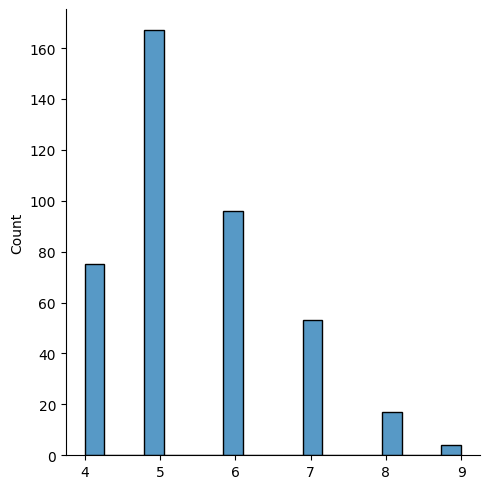

In [49]:
plt.figure(figsize=(3,3),dpi=200);
data = [len(str.split(' ')) for str in strings]
sns.displot(data);

### Кластеризация датасета методом К-средних и векторизацией подсчетом

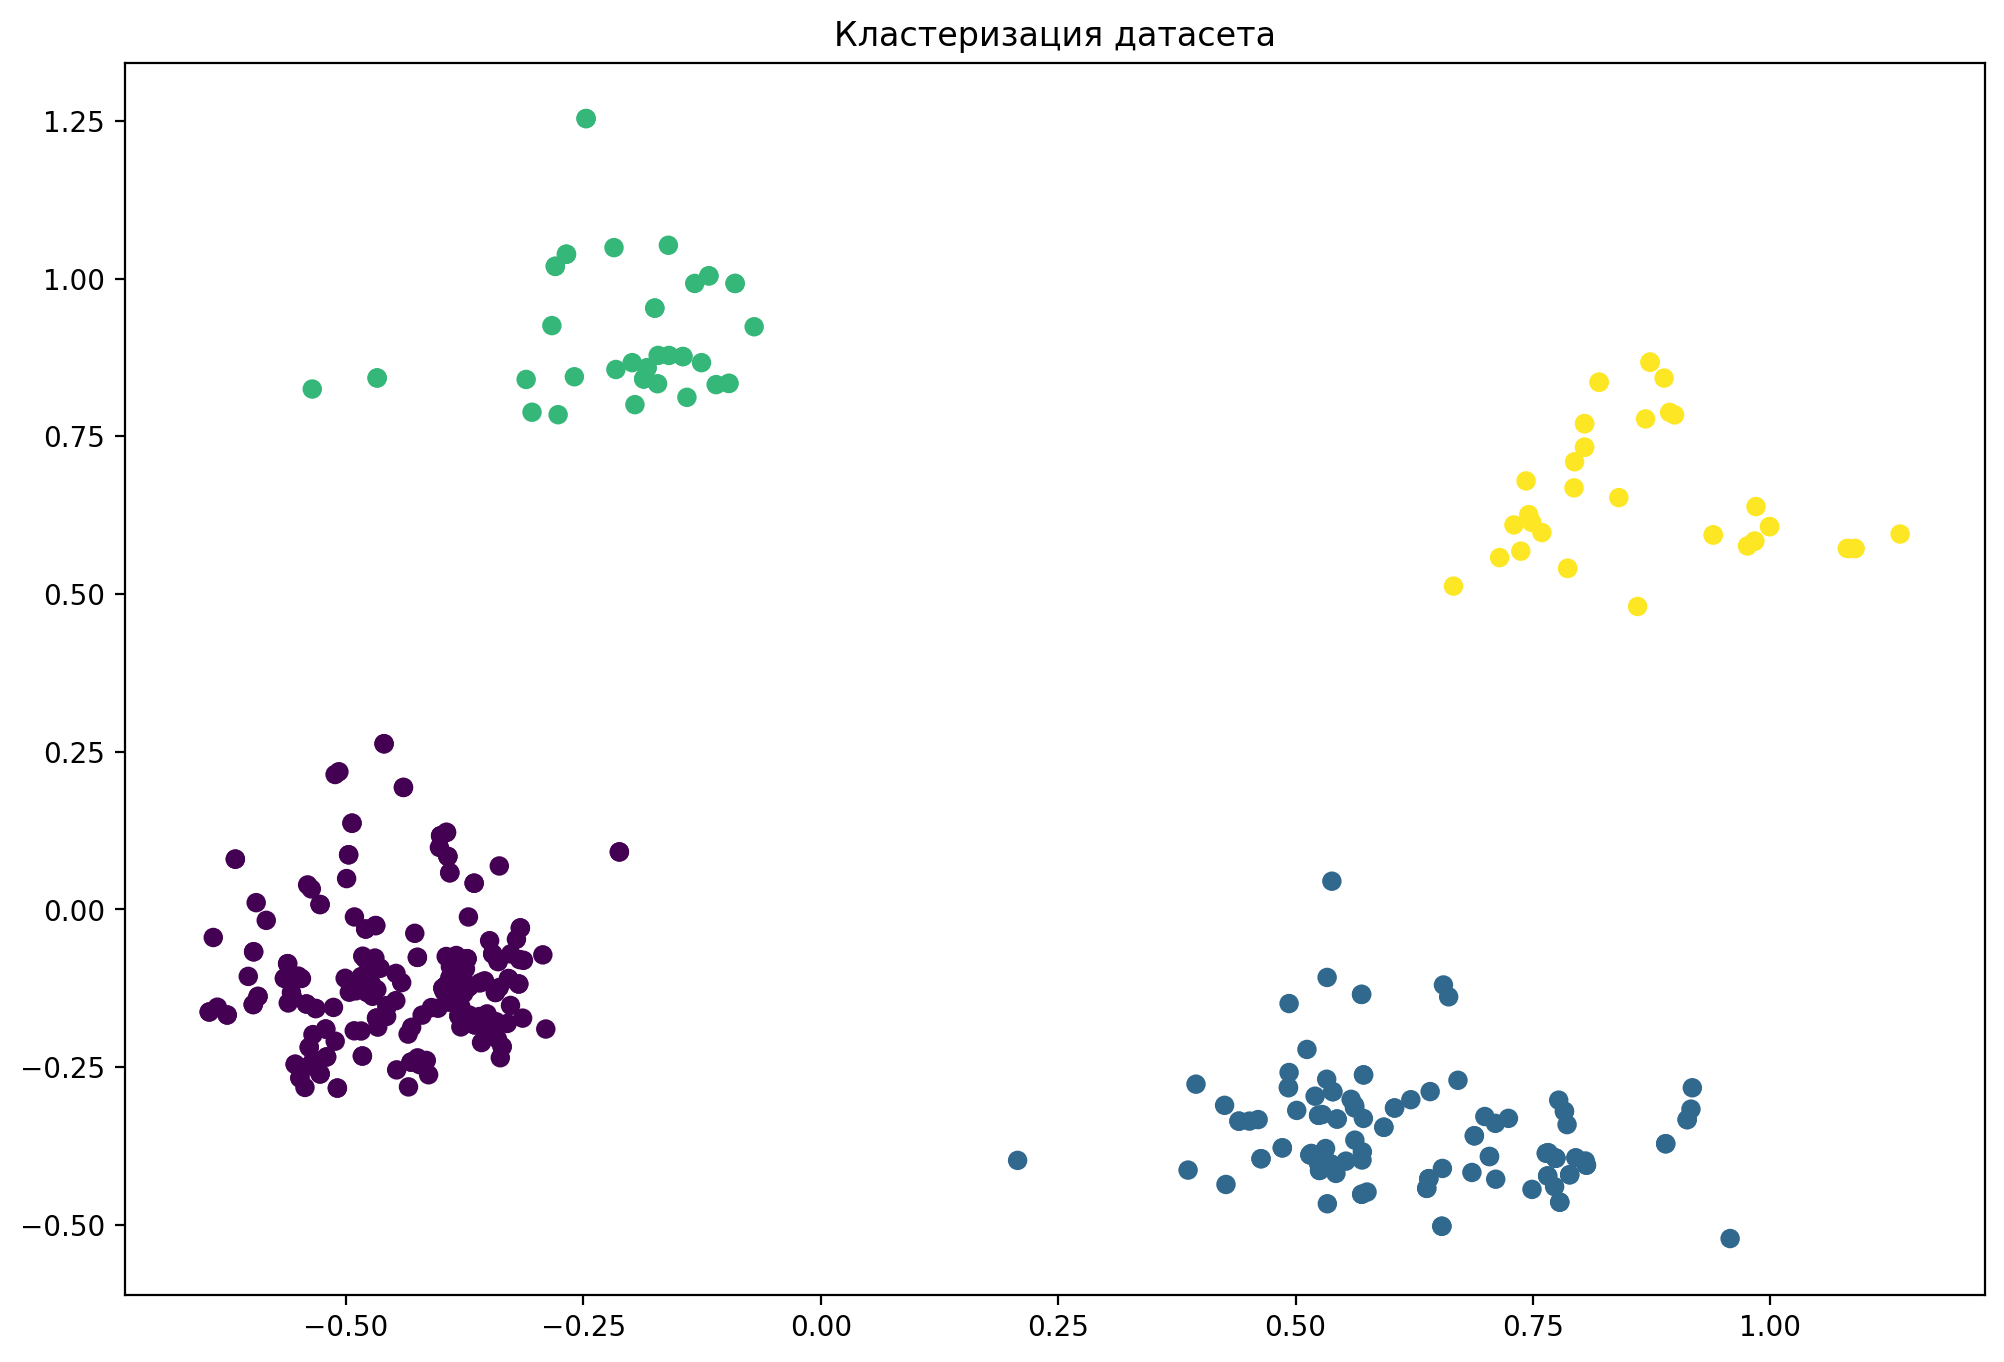

In [16]:
plt.figure(figsize=(12,8),dpi=200)

# Векторизация подсчетом на основе всего датасета
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer()
vector = Vectorizer.fit_transform(strings)
strings_vectorized = vector.toarray()

# Метод главных компонент (необходим для преобразования из 546-мерного пространства в 2-мерное)
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_model.fit(strings_vectorized)
strings_vectorized_2n = pca_model.transform(strings_vectorized)

# Кластеризация методом K-средних
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,n_init="auto").fit(strings_vectorized_2n)

# Визуализация
x = strings_vectorized_2n[:,0]
y = strings_vectorized_2n[:,1]
plt.scatter(x,y,c=kmeans.labels_)
plt.title("Кластеризация датасета");

#### Строки, сгруппированные по кластерам

In [50]:
clusters = {}
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] not in clusters:
        clusters[kmeans.labels_[i]] = []
    clusters[kmeans.labels_[i]].append(strings[i])

In [51]:
print(sorted(clusters[0]))

['возьми его ключи от машины', 'возьми ключи от его машины', 'вот как оно все обернулось', 'все говорят что они невиновны', 'все они говорят что невиновны', 'говорят в горах погода быстро меняется', 'говорят погода в горах быстро меняется', 'думаю я мог бы и один это сделать', 'если у тебя будет время завтра приходи ко мне', 'зачем тому была нужна отвертка', 'здесь есть поблизости банкомат', 'здесь поблизости есть банкомат', 'иди сюда я тебе еще кое-что покажу', 'извините я хотел бы ьто примерить', 'извините я хотел бы это примерить', 'им были нужны деньги', 'им нужны были деньги', 'интерфейс очень интуитивно понятен', 'как бы ты посоветовал мне поступить', 'какая гора самая высокая в европе', 'какая гора самая высокая в мире', 'какое это имеет отношение к школе', 'камое это имеет отношение к школе', 'кен был вчера дома', 'кен вчера был дома', 'когда я его видел в последний раз', 'кто мне может это объяснить', 'кто может мне это объяснить', 'кто тебе это все сказал', 'кто тебе это все 

In [52]:
print(sorted(clusters[1]))

['больше мы для него ничего не можем сделать', 'вчера был просто не мой день', 'вчера просто был не мой день', 'здесь ничего никогда не происходит', 'математик такого бы не сказал', 'мне было не с кем поговорить', 'мне никогда не нужно было столько денег', 'мне сегодня не нужно никуда идти', 'мы больше не хотим ждать', 'мы были не готовы', 'мы их никогда не найдем', 'мы не были готовы', 'мы не были так заняты', 'мы не можем ничего сделать', 'мы не можем прожить ни дня без воды', 'мы ни дня не можем прожить без воды', 'мы ничего не можем сделать', 'мэри была не готова', 'мэри говорит что ничего не будет делать', 'мэри не была готова', 'не думаю что можно что-то сделать', 'не слышно было ни звука', 'никто больше туда не ходит', 'никто не знает что на самом деле происходит', 'никто не знает чуо на самом деле происходит', 'никто ничем никому не обязан', 'никто туда больше не ходит', 'он больше не может ждать', 'он больше не может идти', 'он был не готов', 'он даже меня не замечает', 'он не

In [53]:
print(sorted(clusters[2]))

['где был том весь день', 'том - один из лучших моих друзей', 'том - один из моих лучших друзей', 'том был мне как отец', 'том был тогда здесь', 'том все мне рассказал', 'том все мне расскатал', 'том всегда меня смешит', 'том выпил уже три чашки кофе', 'том действует мне на нервы', 'том ест яблоко или банан', 'том и мэри объявили сегодня о своей пбмолвке', 'том и мэри объявили сегодня о своей помолвке', 'том каждое утро читает газету', 'том меня всегда смешит', 'том меня сейчас хочет видеть', 'том мне действует на нервы', 'том мне сегодня это сказал', 'том очень мае помог', 'том очень мне помог', 'том очень этим гордился', 'том продал сегоднь три холодильника', 'том продал сегодня три холодильника', 'том сегодня будет здесь', 'том сегодня мне это сказал', 'том сможет это сделать без нашей помощи', 'том тебе звонил вчера вечером', 'том тогда был здесь', 'том уже выпил три чашки кофе', 'том уже должен быть дола', 'том уже должен быть дома', 'том уже это сделал', 'том хочет меня сейчас ви

In [54]:
print(sorted(clusters[3]))

['том больше здесь не работает', 'том больше мне не доверяет', 'том больше не может здесь оставаться', 'том больше не хотел об этом думать', 'том бы никогда не согласился', 'том бы никогда не соглхсился', 'том был не единственным свидетелем', 'том был просто не готов', 'том еще нас не видел', 'том еще ничего мне не сказал', 'том здесь больше не работает', 'том нам ничего не дал', 'том не был занят', 'том не живет в бостоне', 'том не знает ничего о семье мэри', 'том не может жить без мэри', 'том не может сегодня прийти', 'том не может сейчас подойти к телефону', 'том не хотел никуда идти', 'том не хочет никого видеть', 'том не хочет сегодня никого видеть', 'том никогда больше тебя не увидит', 'том никогда мне не казывал свою фамилию', 'том никогда мне не называл свою фамилию', 'том никогда нам ничего не рассказывает', 'том никогда тебя больше не увидит', 'том никогда туда больше не вернется', 'том ничего мне не говорит', 'том ничего мне не моворит', 'том ничего нам не дал', 'том ничего 

# Проверка результатов работы базовых алгоритмов

### Все функции, кроме функции check_pronoun_correspondence, соответствуют единому прототипу
```python
def name_of_algorithm(string1:str, string2:str)->float
    ...
    return result
где result - значение от 0 до 1, где 0 - полное несовпадение строк, 1 - полное совпадение строк

def is_rewrite_name_of_algorithm(string1:str, string2:str, threshold:float)->bool
    return name_of_algorithm(string1,string2) > threshold
```

### Функция проверки алгоритма

In [22]:
from typing import Callable
def check_algorithm(function:Callable[str,str]):
    print('============ Строки, результат алгоритма которых должен стремиться к 1 ============')
    print()
    print('мы не можем прожить ни дня без воды',' :: ','мы ни дня не можем прожить без воды')
    print(function('мы не можем прожить ни дня без воды','мы ни дня не можем прожить без воды'))
    print()
    print('том не живет в бостоне',' :: ','том сейчас не живет в бостоне')
    print(function('том не живет в бостоне','том сейчас не живет в бостоне'))
    print()
    print('том и мэри объявили сегодня о своей помолвке',' :: ','том и мэри объявили сегодня о своей пбмолвке')
    print(function('том и мэри объявили сегодня о своей помолвке','том и мэри объявили сегодня о своей пбмолвке'))
    print()
    print('многие птицы на зиму улетают на юг',' :: ','многие птицы осенью улетают на юг')
    print(function('многие птицы на зиму улетают на юг','многие птицы осенью улетают на юг'))
    print()
    print('============ Строки, результат алгоритма которых должен стремиться к 0 ============')
    print()
    print('мы не можем прожить ни дня без воды',' :: ','многие птицы осенью улетают на юг')
    print(function('мы не можем прожить ни дня без воды','многие птицы осенью улетают на юг'))
    print()
    print('мы не можем прожить ни дня без воды',' :: ','я не могу ничего найти')
    print(function('том и мэри объявили сегодня о своей помолвке','почему она так с ним поступает'))
    print()
    print('ты нашел их или нет',' :: ','ты не будешь один')
    print(function('ты нашел их или нет','ты не будешь один'))
    print()
    print('я больше не хочу с тобой играть',' :: ','я не могу ничего найти')
    print(function('я больше не хочу с тобой играть','я не могу ничего найти'))
    print()
    print('я не хочу больше на вас работать',' :: ','я не могу ничего найти')
    print(function('я не хочу больше на вас работать','я не могу ничего найти'))
    print()
    print('я не хочу больше на вас работать',' :: ','я не хочу с тобой больше играть')
    print(function('я не хочу больше на вас работать','я не хочу с тобой больше играть'))
    print()
    print('я ничего не хочу делать',' :: ','я ничего не хочу пить')
    print(function('я ничего не хочу делать','я ничего не хочу пить'))
    print()
    print('почему она так с ней поступает',' :: ','почему она так с ним поступает')
    print(function('почему она так с ней поступает','почему она так с ним поступает'))

#### Дивергенция Дженсена-Шеннона

In [23]:
check_algorithm(JSD.JSD)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
1.0

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.725180098873329

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.6601110032770636

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.6571460578958184

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.16127667007450353

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.16495713764663977

ты нашел их или нет  ::  ты не будешь один
0.2628430798444362

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.2628430798444362

я не хочу больше на вас работать  ::  я не могу ничего найти
0.24557802576845789

я не хочу больше на вас работать  ::  я не хочу с тобой 

#### Косинусное сходство при векторизации подсчетом

In [24]:
check_algorithm(cosine_count.cosine_count)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
0.9999999999999998

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.8944271909999159

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.8333333333333335

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.8164965809277261

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.0

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.0

ты нашел их или нет  ::  ты не будешь один
0.22360679774997896

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.22360679774997896

я не хочу больше на вас работать  ::  я не могу ничего найти
0.20412414523193154

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть


#### Косинусное сходство при векторизации TF-IDF

In [25]:
check_algorithm(cosine_tfidf.cosine_tfidf)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
1.0000000000000002

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.8181802073667197

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.7168117414430624

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.7192918182472702

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.0

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.0

ты нашел их или нет  ::  ты не будешь один
0.12735952979479354

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.12735952979479356

я не хочу больше на вас работать  ::  я не могу ничего найти
0.11521554337793123

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть


#### Алгоритм Дамерау-Левенштейна

In [26]:
check_algorithm(dam_lev_dist.damerau_levenshtein_distance)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
0.6

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.7586206896551724

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.9772727272727273

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.7941176470588236

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.17142857142857137

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.2272727272727273

ты нашел их или нет  ::  ты не будешь один
0.3157894736842105

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.3548387096774194

я не хочу больше на вас работать  ::  я не могу ничего найти
0.375

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть


#### Манхэттенское расстояние

In [27]:
check_algorithm(distance_L1.distance_L1)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
1.0

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.8888888888888888

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.8333333333333334

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.7692307692307692

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.0

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.0

ты нашел их или нет  ::  ты не будешь один
0.2222222222222222

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.2222222222222222

я не хочу больше на вас работать  ::  я не могу ничего найти
0.19999999999999996

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть
0.545454545454545

#### Евклидово расстояние

In [28]:
check_algorithm(distance_L2.distance_L2)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
1.0

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.8888888888888888

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.882148869802242

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.8667653224947017

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.7327387580875756

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.6984886554222364

ты нашел их или нет  ::  ты не будешь один
0.7060276321039344

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.7060276321039344

я не хочу больше на вас работать  ::  я не могу ничего найти
0.717157287525381

я не хочу больше на вас работать  ::  я не хочу с тобой боль

#### Сочетание алгоритмов выравнивания последовательностей и расстояния Хэмминга

In [29]:
check_algorithm(hamming_distance_and_sequence_alignment_composition.hamming_distance_normalized)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
0.375

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.8333333333333334

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.875

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.7142857142857143

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.0

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.0

ты нашел их или нет  ::  ты не будешь один
0.19999999999999996

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.2857142857142857

я не хочу больше на вас работать  ::  я не могу ничего найти
0.2857142857142857

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть
0.4285714285714286

я ничего

#### Расстояние Хэмминга

In [30]:
check_algorithm(hamming_distance_custom.hamming_distance_custom)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
0.4571428571428572

том не живет в бостоне  ::  том сейчас не живет в бостоне
0

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.9772727272727273

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0

ты нашел их или нет  ::  ты не будешь один
0

я больше не хочу с тобой играть  ::  я не могу ничего найти
0

я не хочу больше на вас работать  ::  я не могу ничего найти
0

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть
0

я ничего не хочу делать  ::  я ничего не хочу пить
0

почему она так с ней поступает  :: 

#### Расстояние Хеллингера

In [31]:
check_algorithm(hellinger.hellinger_distance)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
1.0

том не живет в бостоне  ::  том сейчас не живет в бостоне
1.0

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
1.0

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
1.0

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.2928932188134524

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.2928932188134524

ты нашел их или нет  ::  ты не будешь один
1.0

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.2928932188134524

я не хочу больше на вас работать  ::  я не могу ничего найти
0.2928932188134524

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть
1.0

я ничего не хочу делать  ::  я ничего не хо

#### Сходство Жаккарда

In [32]:
check_algorithm(jaccard.Jaccard)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
1.0

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.7857142857142857

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
1.0

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.8333333333333334

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.4166666666666667

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.43478260869565216

ты нашел их или нет  ::  ты не будешь один
0.4666666666666667

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.6

я не хочу больше на вас работать  ::  я не могу ничего найти
0.42857142857142855

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть
0.8

я ничего не

#### Расстояние Джаро-Винклера

In [33]:
check_algorithm(jaro_winkler.jaro_Winkler)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
0.9044155844155843

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.8789968652037617

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.9862579281183932

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.891545709192768

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.6091630591630591

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.5215488215488215

ты нашел их или нет  ::  ты не будешь один
0.6510929730743972

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.6756655741475476

я не хочу больше на вас работать  ::  я не могу ничего найти
0.6501893939393939

я не хочу больше на вас работать  ::  я не х

#### Расстояние Карловского

In [34]:
check_algorithm(karlovskiy_distance.karlovskiy_distance)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
1.0

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.9019607843137255

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.9772727272727273

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.835820895522388

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.02941176470588236

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.027027027027026973

ты нашел их или нет  ::  ты не будешь один
0.2777777777777778

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.15094339622641506

я не хочу больше на вас работать  ::  я не могу ничего найти
0.2222222222222222

я не хочу больше на вас работать  ::  я не хочу с тобой

#### Расстояние Левенштейна

In [35]:
check_algorithm(lev_dist.levenshtein_distance)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
0.6

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.7586206896551724

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.9772727272727273

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.7941176470588236

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.17142857142857137

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.2272727272727273

ты нашел их или нет  ::  ты не будешь один
0.3157894736842105

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.3548387096774194

я не хочу больше на вас работать  ::  я не могу ничего найти
0.375

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть


#### Алгоритм Майерса

In [36]:
check_algorithm(myers.myers)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
0.6

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.7586206896551724

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.9772727272727273

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.7941176470588236

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.17142857142857137

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.2272727272727273

ты нашел их или нет  ::  ты не будешь один
0.3157894736842105

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.3548387096774194

я не хочу больше на вас работать  ::  я не могу ничего найти
0.375

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть


#### N-граммы

In [37]:
check_algorithm(ngrams.ngram_comparison)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
1.0

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.8275862068965517

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.9285714285714286

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.7804878048780488

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.0

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.043478260869565216

ты нашел их или нет  ::  ты не будешь один
0.2222222222222222

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.06896551724137931

я не хочу больше на вас работать  ::  я не могу ничего найти
0.13333333333333333

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть

### Индекс Тверского на основании N-грамм

In [38]:
check_algorithm(ngrams.tverskiy_ngram_comparison)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
1.0

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.8275862068965517

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.9285714285714286

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.7804878048780488

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.0

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.043478260869565216

ты нашел их или нет  ::  ты не будешь один
0.2222222222222222

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.06896551724137931

я не хочу больше на вас работать  ::  я не могу ничего найти
0.13333333333333333

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть

#### Сравнение по местоимениям

In [39]:
check_algorithm(pronouns.check_pronoun_correspondence)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
True

том не живет в бостоне  ::  том сейчас не живет в бостоне
True

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
True

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
True

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
False

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
False

ты нашел их или нет  ::  ты не будешь один
False

я больше не хочу с тобой играть  ::  я не могу ничего найти
False

я не хочу больше на вас работать  ::  я не могу ничего найти
False

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть
False

я ничего не хочу делать  ::  я ничего не хочу пить
True

почему она так с ней поступает

#### Коэффициент Сёренсена

In [40]:
check_algorithm(sorensen.Sorensen)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
1.0

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.8444444444444444

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.961038961038961

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.8064516129032258

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.125

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.15151515151515152

ты нашел их или нет  ::  ты не будешь один
0.25

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.2127659574468085

я не хочу больше на вас работать  ::  я не могу ничего найти
0.2553191489361702

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть
0.6785714285714

#### Сходство множеств слов

In [41]:
check_algorithm(word_set.word_set)

============ Строки, результат алгоритма которых должен стремиться к 1 ============

мы не можем прожить ни дня без воды  ::  мы ни дня не можем прожить без воды
1.0

том не живет в бостоне  ::  том сейчас не живет в бостоне
0.8333333333333334

том и мэри объявили сегодня о своей помолвке  ::  том и мэри объявили сегодня о своей пбмолвке
0.7777777777777778

многие птицы на зиму улетают на юг  ::  многие птицы осенью улетают на юг
0.7142857142857143

============ Строки, результат алгоритма которых должен стремиться к 0 ============

мы не можем прожить ни дня без воды  ::  многие птицы осенью улетают на юг
0.0

мы не можем прожить ни дня без воды  ::  я не могу ничего найти
0.0

ты нашел их или нет  ::  ты не будешь один
0.125

я больше не хочу с тобой играть  ::  я не могу ничего найти
0.19999999999999996

я не хочу больше на вас работать  ::  я не могу ничего найти
0.19999999999999996

я не хочу больше на вас работать  ::  я не хочу с тобой больше играть
0.4

я ничего не хочу делать 

In [56]:
hamming_distance_custom.hamming_distance_custom('1234','143')

0